# Comparing Directional Data (e.g. wind direction)

Comparing directional data requires a little extra care and needs different axis on the plots. 

In [1]:
import modelskill as ms
import pandas as pd
import mikeio

In [2]:
fn = "../tests/testdata/wave_dir.dfs0"
ds = mikeio.read(fn)
ds

<mikeio.Dataset>
dims: (time:9026)
time: 2006-12-20 22:00:00 - 2007-12-31 23:00:00 (9026 records)
geometry: GeometryUndefined()
items:
  0:  China_Model: Sign. Wave Height <Significant wave height> (meter)
  1:  China_Measured: Sign. Wave Height <Significant wave height> (meter)
  2:  China_Model: Mean Wave Direction <Mean Wave Direction> (degree)
  3:  China_Measured: Mean Wave Direction <Mean Wave Direction> (degree)

In [8]:
qwdir = ms.Quantity.from_mikeio_iteminfo(ds.items[2])
qwdir

Quantity(name='Mean Wave Direction', unit='degree')

In [9]:
cmp = ms.from_matched(ds.to_dataframe(), 
                      obs_item=ds.items[3].name, 
                      mod_items=[ds.items[2].name],
                      quantity=qwdir,
)
cmp

<Comparer>
Quantity: Mean Wave Direction [degree]
Observation: China_Measured: Mean Wave Direction, n_points=9026
 Model: China_Model: Mean Wave Direction, rmse=71.358

<AxesSubplot: title={'center': 'China_Measured: Mean Wave Direction'}, ylabel='Mean Wave Direction [degree]'>

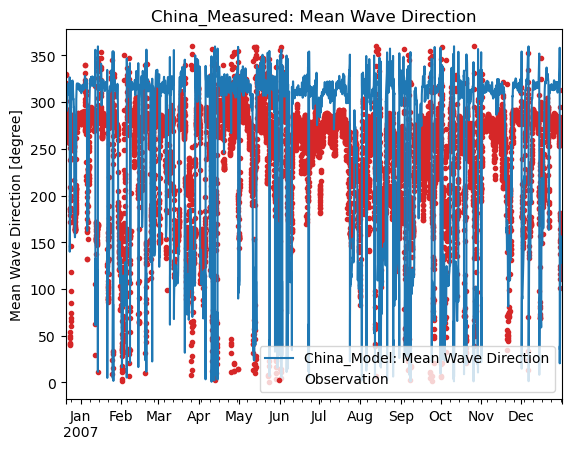

In [10]:
cmp.plot.timeseries()